# Introduction into pandas

## The dataframe

* Core to pandas is a data structure called dataframe.
* In principle it is a table like structure:
 * Named colums with arbitrary types
 * Indices to conveniently select, filter and aggregate rows
 

    Index      | columns
    -------------------------------------------------------
    date       | temperature | humidity | description
    -------------------------------------------------------
    2018-08-15 | 36.6        | 0.8      | "Hot like always"
    2018-08-16 | 40.6        | 0.9      | "Even hotter"

In [1]:
# the most famous imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Dataframes can be constructed und loaded from a vast amount of sources
* directly from e.g. a dict, list of list...
* file formatls: csv, parquet
* from a DB via sql query 

In [2]:
df = pd.DataFrame({"a": [1,2,3]*3, "b": ['a','b','c']*3, "c": [0.3,0.4,None]*3})
df

,a,b,c
0,1,a,0.3
1,2,b,0.4
2,3,c,NaN
3,1,a,0.3
4,2,b,0.4
5,3,c,NaN
6,1,a,0.3
7,2,b,0.4
8,3,c,NaN


In [3]:
# access like a dictionary
df['b']

0    a
1    b
2    c
3    a
4    b
5    c
6    a
7    b
8    c
Name: b, dtype: object

In [4]:
# access like a method (tab completion!)
df.a

0    1
1    2
2    3
3    1
4    2
5    3
6    1
7    2
8    3
Name: a, dtype: int64

In [5]:
# multiple colums
df[['b','c']]

,b,c
0,a,0.3
1,b,0.4
2,c,NaN
3,a,0.3
4,b,0.4
5,c,NaN
6,a,0.3
7,b,0.4
8,c,NaN


In [6]:
# first 5 rows
df[:5]

,a,b,c
0,1,a,0.3
1,2,b,0.4
2,3,c,NaN
3,1,a,0.3
4,2,b,0.4


In [7]:
# 5 rows in the middle
df[2:7] # slicing

,a,b,c
2,3,c,NaN
3,1,a,0.3
4,2,b,0.4
5,3,c,NaN
6,1,a,0.3


In [8]:
# combine it (dice it!)
df[['b','c']][2:7]

,b,c
2,c,NaN
3,a,0.3
4,b,0.4
5,c,NaN
6,a,0.3


In [9]:
# filtering is very important!
df['c'].notnull()

0     True
1     True
2    False
3     True
4     True
5    False
6     True
7     True
8    False
Name: c, dtype: bool

In [10]:
df['c']>0.3

0    False
1     True
2    False
3    False
4     True
5    False
6    False
7     True
8    False
Name: c, dtype: bool

In [11]:
# now we can use this "binary" index to filter out rows
df[df['c']>0.3]

,a,b,c
1,2,b,0.4
4,2,b,0.4
7,2,b,0.4


In [12]:
# we can also build complex logical combinations
df[((df['c'].notnull())&(df['a']==2))|(df['b']=='a')]

,a,b,c
0,1,a,0.3
1,2,b,0.4
3,1,a,0.3
4,2,b,0.4
6,1,a,0.3
7,2,b,0.4


# Data exploration

Now lets explore a real dataset: NYC Taxi and Limousine Commission trip dataset
* free download at https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
* 10GB per year only yello cab

Let's explore it

In [13]:
import os
nytaxi_directory = '/srv/taxi-data-csv'

In [14]:
# load the csv, but only the first 100000 rows (otherwise it's not fun)
df = pd.read_csv(os.path.join(nytaxi_directory, 'yellow_tripdata_2017-01.csv'), nrows=100000)

In [15]:
# a very first step is just to look what it is
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2017-01-01 16:29:29,2017-01-01 16:38:43,1,1.40,1,N,236,237,2,8.5,0.0,0.5,0.00,0.0,0.3,9.30
99996,1,2017-01-01 16:29:29,2017-01-01 16:40:00,1,0.70,1,N,230,230,2,7.5,0.0,0.5,0.00,0.0,0.3,8.30
99997,2,2017-01-01 16:29:29,2017-01-01 16:34:33,2,0.97,1,N,107,137,1,5.5,0.0,0.5,1.26,0.0,0.3,7.56
99998,2,2017-01-01 16:29:29,2017-01-01 16:35:55,1,0.65,1,N,170,234,2,6.0,0.0,0.5,0.00,0.0,0.3,6.80


In [16]:
# also nice is describe for a variety of summary statistics
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.588150,1.748940,3.485438,1.070760,160.08176,156.889520,1.481280,13.347032,0.003175,0.49485,1.467584,0.446445,0.299604,16.062096
std,0.492171,1.346784,4.422737,0.370398,68.95467,72.474652,0.518085,13.039267,0.051647,0.05309,2.647406,1.855391,0.014814,15.819856
min,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,-52.000000,0.000000,-0.50000,-6.060000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,1.080000,1.000000,113.00000,100.000000,1.000000,6.000000,0.000000,0.50000,0.000000,0.000000,0.300000,7.560000
50%,2.000000,1.000000,1.810000,1.000000,161.00000,161.000000,1.000000,9.000000,0.000000,0.50000,0.000000,0.000000,0.300000,10.560000
75%,2.000000,2.000000,3.620000,1.000000,231.00000,231.000000,2.000000,14.500000,0.000000,0.50000,1.960000,0.000000,0.300000,16.620000
max,2.000000,6.000000,86.300000,6.000000,265.00000,265.000000,4.000000,360.000000,1.000000,0.50000,147.000000,68.500000,0.300000,360.300000


In [17]:
# or only the first few rows
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [18]:
# very handy are some prediefined statistics functions
df.tip_amount.mean()

1.4675844

In [19]:
df['tip_amount'].std()

2.6474055160545964

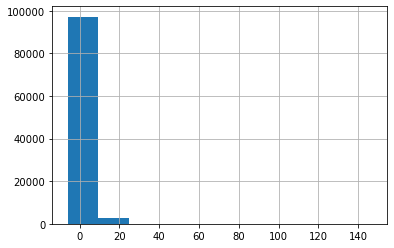

In [20]:
# but also plotting is (very) easy 
df.tip_amount.hist()

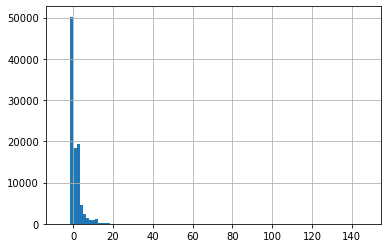

In [21]:
# more bins!
df.tip_amount.hist(bins=100)

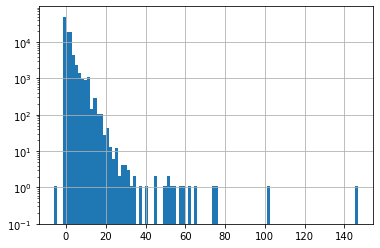

In [22]:
# these are the things you have to search at stackoverflow...
fig, ax = plt.subplots()
df.tip_amount.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
# negative tips?

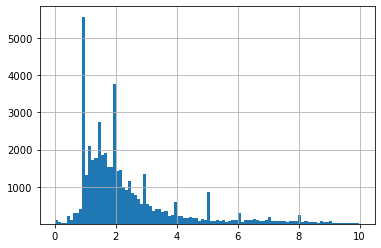

In [23]:
#non 0 tips
fig, ax = plt.subplots()
df[(df.tip_amount>0)&(df.tip_amount<10)].tip_amount.hist(ax=ax, bins=100, bottom=0.1)

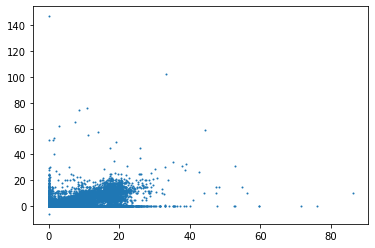

In [24]:
# 2D scatter plot is a very powerful visualization (but often very expensive)
plt.scatter(df.trip_distance, df.tip_amount, s=1)

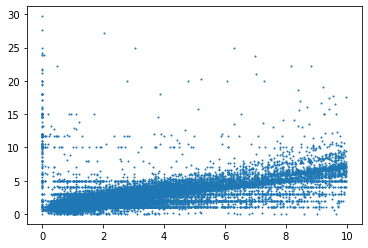

In [25]:
# often one wants to "zoom in", we know how to do that: filtering!!
df_cut = df[(df.tip_amount>0)&(df.tip_amount<30)&(df.trip_distance<10)]
plt.scatter(df_cut.trip_distance, df_cut.tip_amount, s=1)

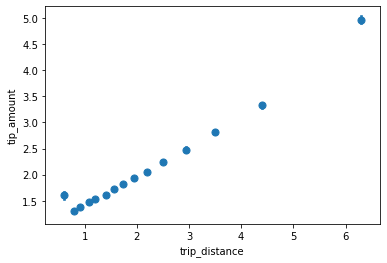

In [26]:
# but more useful is a a so called "profile plot", only available in the seaborn package
import seaborn as sns
sns.regplot(x=df_cut.trip_distance, y=df_cut.tip_amount, x_bins=15, fit_reg=None)

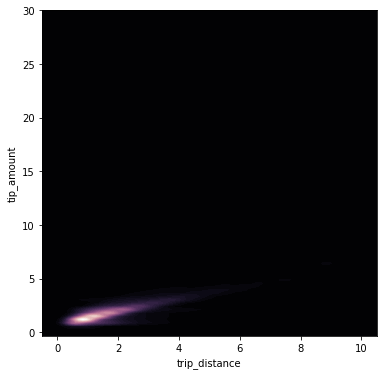

In [27]:
# not so useful, but awesome looking (very slow)
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df_cut.trip_distance, df_cut.tip_amount, cmap=cmap, n_levels=60, shade=True);


In [28]:
# a heatmap (2D-Histogram) is also an interesting visualization, but I haven't found one, so we have to build it
df_cut = df[(df.tip_amount>3)&(df.tip_amount<15)&(df.trip_distance<15)]
heatmap_df = df_cut.groupby([pd.cut(df_cut.trip_distance, 20), pd.cut(df_cut.tip_amount, 20)]).tip_amount.count()

In [29]:
heatmap_df

trip_distance   tip_amount      
(-0.015, 0.75]  (3.008, 3.617]       6
                (3.617, 4.213]      17
                (4.213, 4.81]        4
                (4.81, 5.406]       44
                (5.406, 6.002]      11
                                    ..
(14.24, 14.99]  (11.371, 11.968]     6
                (11.968, 12.564]     3
                (13.16, 13.757]      2
                (13.757, 14.354]     2
                (14.354, 14.95]      4
Name: tip_amount, Length: 303, dtype: int64

In [30]:
# unstacking is a very important transformation, but I only do it try-and-error
heatmap_df.unstack()

tip_amount,"(3.008, 3.617]","(3.617, 4.213]","(4.213, 4.81]","(4.81, 5.406]","(5.406, 6.002]","(6.002, 6.599]","(6.599, 7.196]","(7.196, 7.792]","(7.792, 8.388]","(8.388, 8.985]","(8.985, 9.582]","(9.582, 10.178]","(10.178, 10.774]","(10.774, 11.371]","(11.371, 11.968]","(11.968, 12.564]","(12.564, 13.16]","(13.16, 13.757]","(13.757, 14.354]","(14.354, 14.95]"
trip_distance,,,,,,,,,,,,,,,,,,,,
"(-0.015, 0.75]",6.0,17.0,4.0,44.0,11.0,6.0,5.0,3.0,7.0,3.0,5.0,28.0,15.0,3.0,38.0,6.0,3.0,2.0,1.0,9.0
"(0.75, 1.499]",32.0,36.0,4.0,51.0,4.0,1.0,1.0,NaN,3.0,1.0,NaN,3.0,NaN,NaN,3.0,NaN,2.0,NaN,1.0,NaN
"(1.499, 2.248]",160.0,41.0,6.0,36.0,7.0,1.0,NaN,NaN,2.0,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2.248, 2.998]",397.0,121.0,19.0,27.0,3.0,NaN,1.0,NaN,3.0,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
"(2.998, 3.748]",634.0,247.0,66.0,38.0,6.0,1.0,2.0,1.0,1.0,NaN,1.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
"(3.748, 4.497]",730.0,263.0,114.0,57.0,12.0,2.0,1.0,NaN,1.0,NaN,NaN,3.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,1.0
"(4.497, 5.246]",426.0,383.0,108.0,91.0,21.0,7.0,3.0,1.0,NaN,NaN,1.0,3.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN
"(5.246, 5.996]",45.0,357.0,158.0,78.0,44.0,7.0,7.0,1.0,2.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
"(5.996, 6.746]",14.0,147.0,194.0,93.0,51.0,29.0,10.0,8.0,1.0,1.0,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN


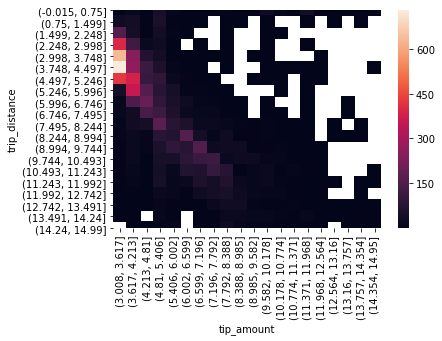

In [31]:
# now plot the 2d-matrix as a heatmap
ax = sns.heatmap(heatmap_df.unstack())

/home/gks/.conda/envs/tutorial/lib/python3.7/site-packages/matplotlib/colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


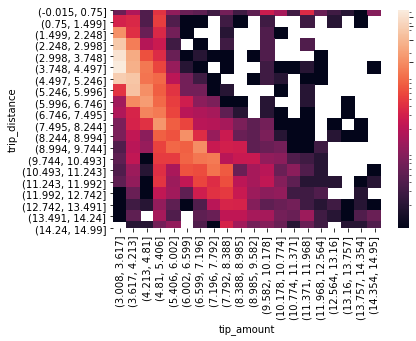

In [32]:
from matplotlib.colors import LogNorm
ax = sns.heatmap(heatmap_df.unstack(), norm=LogNorm(vmin=heatmap_df.min(), vmax=heatmap_df.max()))

# Now it's your turn!
Explore a bit further:
* what other variables are there?
* what data types are they?
* is data missing?
* can you spot interesting correlations
